# Predicting Final Exam Scores Using Linear Regression

**Student Name:** Donald Bango   
**Course:** Data Mining  
**Instructor:** Dr. Letort  
**Date:** 11 September 2024  


**Table of Contents**

1. CRISP-DM and the Step Cycles  
2. Business Understanding, Data, and Data Preparation  
3. Model Creation  
4. Analysis of Results  
5. Plotting the Data and the Linear Relationship  
6. Finding an Equation Using the Method of Least Squares  
7. Predicting the Final Exam Grade for a Student Who Scored 86% on the Midterm  
8. Conclusion  


### CRISP-DM and the Step Cycles

The CRISP-DM (Cross-Industry Standard Process for Data Mining) methodology is a flexible and structured framework for guiding data mining projects through six distinct phases, allowing for back-and-forth movement between stages as necessary (IBM, 2021; Tripathi et al., 2021). Each phase is vital to ensure the project is systematically managed from objective alignment to deployment.

1. **Business Understanding**: This phase focuses on defining project objectives, aligning them with business needs, and conducting planning, risk assessment, and technical requirement evaluation (Schröer et al., 2021; Tripathi et al., 2021). In this assignment, the goal is to predict final exam scores based on midterm results, helping educators identify students who may need additional support or resources. Early intervention based on these predictions can improve student performance, ultimately increasing both course success and final exam outcomes.

2. **Data Understanding**: This phase involves collecting and exploring the data to assess its quality and gain initial insights. For this project, data from the DSC-570 Midterm and Final Exams dataset is analyzed through exploratory data analysis (EDA) to understand its distributions and relationships (Schröer et al., 2021). The dataset includes 12 students' midterm and final exam scores. Key tasks involve checking data quality, performing descriptive statistics, analyzing distributions, and identifying any potential issues before proceeding.

3. **Data Preparation**: During this phase, the dataset is prepared for modeling by defining inclusion and exclusion criteria and addressing any data quality issues. For this project, the Midterm and Final Exams dataset is well-organized, complete, and free of outliers, so minimal data cleaning is required. No transformations are necessary since the data is already in an optimal format for analysis. Feature selection will be performed based on the model chosen (Schröer et al., 2021).

4. **Modeling**: In this step, the modeling technique is selected, and the model and test case are built (Schröer et al., 2021). Linear regression, using the least squares method, is chosen for this task as it effectively models the relationship between midterm (X) and final exam scores (Y), two continuous variables. Adjustments to model parameters and testing the model are crucial to ensure the best fit.

5. **Evaluation**: The model’s performance is evaluated to ensure it meets the defined business objectives, using metrics like R-squared to assess how well the model fits the data (Schröer et al., 2021). This phase also includes validating model assumptions, testing model performance, and analyzing results to determine if the model is suitable for deployment. Additionally, it is essential to review the process and address any issues that might affect performance, such as parameter selection and feature engineering (Tripathi et al., 2021). Based on the evaluation results, it may be necessary to revisit and refine previous steps to improve model performance before proceeding to the deployment phase.

6. **Deployment**: After evaluating the model, it can be deployed for use, possibly as a final report or software component, as typically described in the user guide. In this case, the model is used to predict final exam scores based on midterm scores, which can help educators make data-driven decisions. This phase includes planning the deployment, with ongoing monitoring and maintenance to ensure the model remains effective over time (Schröer et al., 2021; Tripathi et al., 2021). Regular assessments may be needed to keep the model aligned with data and business objectives.

### References:  
- IBM. (2021). CRISP-DM Help Overview. IBM Documentation. https://www.ibm.com/docs/en/spss-modeler/saas?topic=dm-crisp-help-overview
- Schröer, C., Kruse, F., & Gómez, J. M. (2021). A systematic literature review on applying CRISP-DM process model. Procedia Computer Science, 181, 526-534. https://doi.org/10.1016/j.procs.2021.01.199
- Tripathi, S., Muhr, D., Brunner, M., Jodlbauer, H., Dehmer, M., & Emmert-Streib, F. (2021). Ensuring the robustness and reliability of data-driven knowledge discovery models in production and manufacturing. Frontiers in Artificial Intelligence, 4. https://doi.org/10.3389/frai.2021.576892


## Business Understanding, Data, and Data Preparation

### Business Understanding
The main business objective is to predict students' final exam scores based on their midterm performance. This can help educators identify students who may struggle in the final exam and offer additional support to improve their outcomes. This understanding is crucial for developing interventions that help students succeed academically.

### Data Understanding
The dataset consists of 12 pairs of midterm and final exam scores. Each student’s midterm score (X) and final exam score (Y) are recorded as follows:

| Midterm Exam (X) | Final Exam (Y) |
|------------------|----------------|
| 72               | 84             |
| 50               | 63             |
| 81               | 77             |
| 74               | 78             |
| 94               | 90             |
| 86               | 75             |
| 59               | 49             |
| 83               | 79             |
| 65               | 77             |
| 33               | 52             |
| 88               | 74             |
| 81               | 90             |


## Import Necessary Libraries

In [75]:
# Libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_absolute_error, mean_squared_error

## Import Data

In [32]:
# Create dataset using the attached data info.
data = {
    'Midterm': [72, 50, 81, 74, 94, 86, 59, 83, 65, 33, 88, 81],
    'Final': [84, 63, 77, 78, 90, 75, 49, 79, 77, 52, 74, 90]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Display the dataset
data


{'Midterm': [72, 50, 81, 74, 94, 86, 59, 83, 65, 33, 88, 81],
 'Final': [84, 63, 77, 78, 90, 75, 49, 79, 77, 52, 74, 90]}

## Exploratory Data Analysis

In [76]:
# Dataset shape
print("Shape of the dataset:", df.shape)

Shape of the dataset: (12, 2)


In [77]:
# Summary statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
         Midterm     Final
count  12.000000  12.00000
mean   72.166667  74.00000
std    17.698656  13.14949
min    33.000000  49.00000
25%    63.500000  71.25000
50%    77.500000  77.00000
75%    83.750000  80.25000
max    94.000000  90.00000


In [78]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Midterm    0
Final      0
dtype: int64


Text(0, 0.5, 'Frequency')

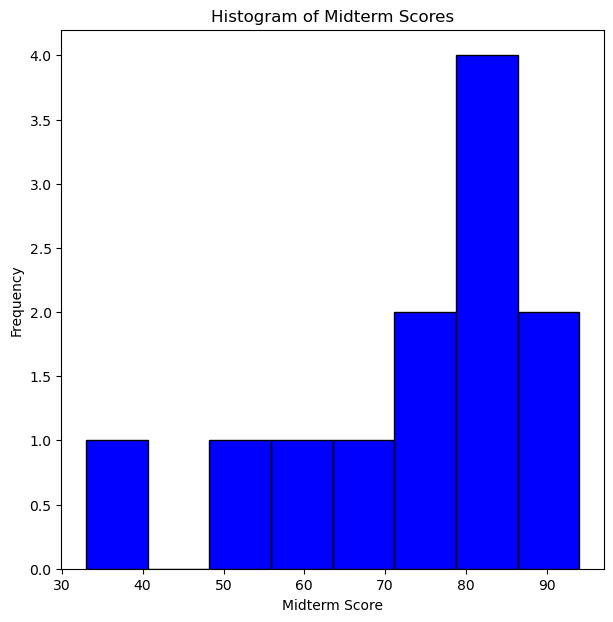

In [86]:
# Visualize midterm distribution using histograms
plt.figure(figsize=(7, 7))
plt.hist(df['Midterm'], bins=8, color='blue', edgecolor='black')
plt.title('Histogram of Midterm Scores')
plt.xlabel('Midterm Score')
plt.ylabel('Frequency')

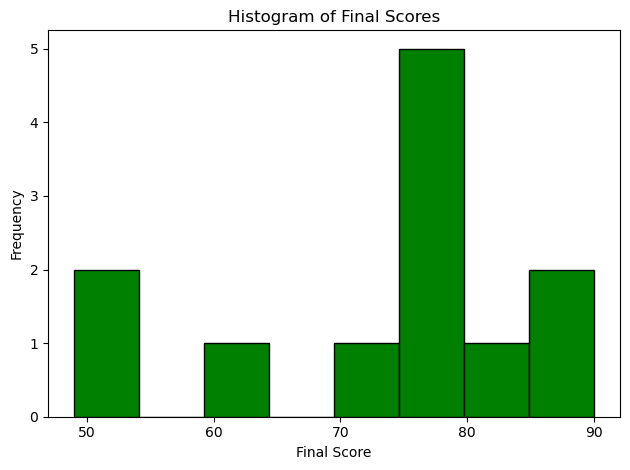

In [83]:
# Visualize final score distribution using histogram
plt.hist(df['Final'], bins=8, color='green', edgecolor='black')
plt.title('Histogram of Final Scores')
plt.xlabel('Final Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [89]:
# Correlation matrix
print("\nCorrelation Matrix:")
print(df.corr())


Correlation Matrix:
          Midterm     Final
Midterm  1.000000  0.782809
Final    0.782809  1.000000


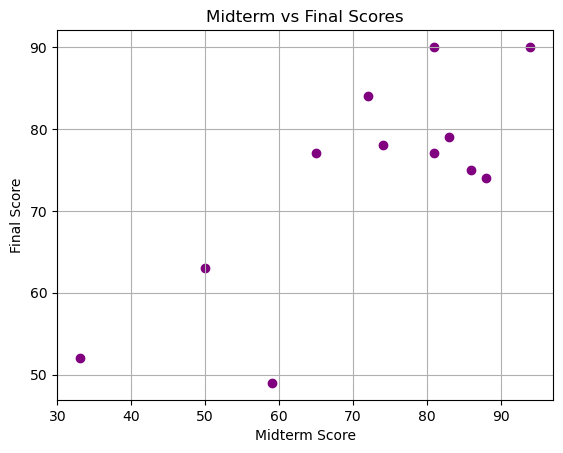

In [90]:
# Scatter plot to visualize relationships between midterm and final scores
plt.scatter(df['Midterm'], df['Final'], color='purple')
plt.title('Midterm vs Final Scores')
plt.xlabel('Midterm Score')
plt.ylabel('Final Score')
plt.grid(True)
plt.show()

In [91]:
# Z-score calculation for detecting outliers
z_scores = stats.zscore(df)

# Convert to DataFrame for better interpretation
z_scores_df = pd.DataFrame(z_scores, columns=df.columns)

# Display rows with z-scores greater than 3 or less than -3 (potential outliers)
outliers = z_scores_df[(z_scores_df > 3) | (z_scores_df < -3)]
print("\nPotential Outliers (Z-scores):")
print(outliers.dropna(how='all'))  # Dropping rows without outliers


Potential Outliers (Z-scores):
Empty DataFrame
Columns: [Midterm, Final]
Index: []


## EDA Summary  
The data is clean, with no missing values or significant outliers, so no further data preparation is necessary.

Note: Key assumptions for linear regression include:  
Linearity  
Independence of Errors  
Homoscedasticity (Constant variance of residuals)  
Normality of Residuals  
No Multicollinearity (for MLR)  


## Model Creation

We chose linear regression to predict the final exam score (Y) from the midterm score (X), as it can effectively models the linear relationship between two continuous variables. This method is suitable for understanding how the midterm score (X) influences the final exam score (Y).

Y = aX + b

Where:
- (X) is the midterm score (independent variable),
- (Y) is the final exam score (dependent variable),
- (a) is the slope (rate of change in final exam score for each point increase in midterm score),
- (b) is the intercept (the expected final exam score when the midterm score is 0).



In [33]:
# Linear regression model using the least squares.
X = df[['Midterm']]  # Reshape to 2D array
y = df['Final']

# Create the linear regression model
model = LinearRegression()

# Train the model
model.fit(X, y)


LinearRegression()

In [35]:
# Extract slope and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Display results
print(f"Slope (a): {slope:.3f}")
print(f"Intercept (b): {intercept:.3f}")


Slope (a): 0.582
Intercept (b): 32.028


## Analysis of Results

The regression model yielded the following equation:

Y = 0.582X + 32.03

## Equation Interpretation
For every additional point a student scores on their midterm, their final exam score is expected to increase by approximately 0.582 points. The intercept value of 32.03 suggests that if a student scored 0 on the midterm, their predicted final score would be about 32.

## Plotting the Data and the Linear Relationship

Ploting the midterm scores against the final scores to visualize the relationship, adding the line of best-fit generated by the linear regression model.


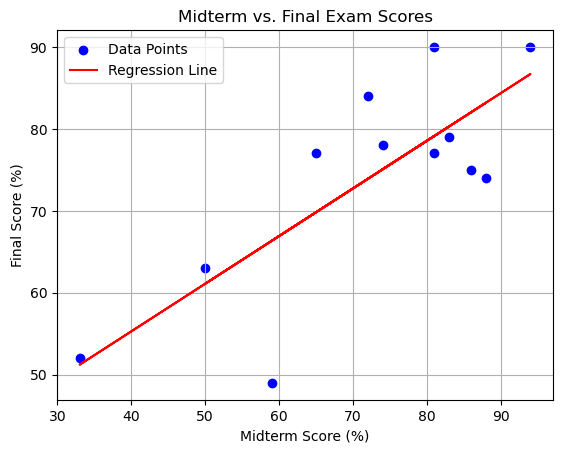

In [37]:
# Plot the data points
plt.scatter(X, y, color='blue', label='Data Points')

# Plot the best-fit regression line
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.xlabel('Midterm Score (%)')
plt.ylabel('Final Score (%)')
plt.title('Midterm vs. Final Exam Scores')
plt.legend()
plt.grid(True)
plt.show()


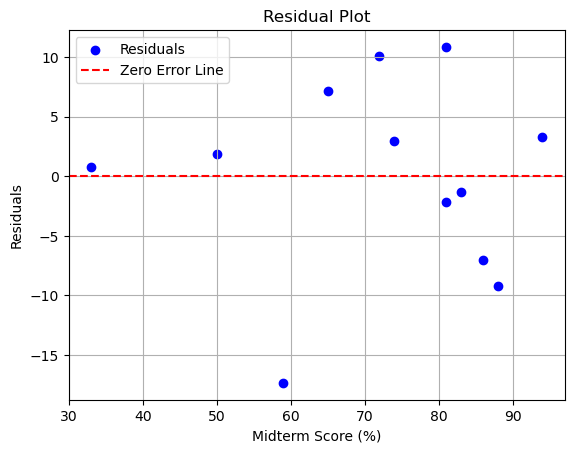

In [40]:
# Calculate residuals (errors)
residuals = y - model.predict(X)

# Plot residuals
plt.scatter(X, residuals, color='blue', label='Residuals')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Error Line')
plt.xlabel('Midterm Score (%)')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend()
plt.grid(True)
plt.show()


In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate Mean Absolute Error (MAE) and Mean Squared Error (MSE)
mae = mean_absolute_error(y, model.predict(X))
mse = mean_squared_error(y, model.predict(X))

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")


Mean Absolute Error (MAE): 6.17
Mean Squared Error (MSE): 61.37


In [93]:
# Calculate the R-squared value
r_squared = model.score(X, y)

# Display the R-squared value
print(f"R-squared: {r_squared:.3f}")


R-squared: 0.613


In [45]:
import scipy.stats as stats

# Q-Q plot of residuals
#stats.probplot(residuals, dist="norm", plot=plt)
#plt.title('Q-Q Plot of Residuals')
#plt.grid(True)
#plt.show()



## Finding an Equation Using the Method of Least Squares  
The equation derived from the regression analysis using the method of least squares is:

Y = 0.582X + 32.03

Where (X) is the midterm score and (Y) is the predicted final score.


## Predicting the Final Exam Grade for a Student (Scored 86 on the Midterm)

In [1]:
# Predict the final exam score for a midterm score of 86
midterm_score = 86
predicted_final = model.predict([[midterm_score]])

# Display the predicted final exam score
print(f"Predicted Final Exam Score for a student with {midterm_score}% on the midterm: {predicted_final[0]:.2f}%")


NameError: name 'model' is not defined

## Conclusion
In this solution, we applied the CRISP-DM methodology to explore and predict students' final exam scores based on their midterm scores. The linear regression model indicated a positive relationship between the scores, resulting in the linear regression equation (Y=0.582X+32.03), which represents the predictive relationship between midterm and final exam scores. This equation allows us to estimate a student’s final exam score based on their midterm performance.

The model’s performance, evaluated with an R-squared value of 0.613, indicates that the midterm score explains about 61.3% of the variance in the final exam scores, which is decent but leaves room for improvement. Additionally, the model produced a Mean Absolute Error (MAE) of 6.17, indicating an average error of about 6 points. This error margin is within a letter grade, making it acceptable for predicting whether a student is likely to pass or fail, and useful for identifying students who may need additional support. The Mean Squared Error (MSE) of 61.37 further reflects the overall prediction error.

This model can assist educators in identifying students who may need additional support or intervention to improve their final exam outcomes, ultimately enhancing both course success and student success rates.


## References


- Schröer, C., Kruse, F., & Gómez, J. M. (2021). A systematic literature review on applying CRISP-DM process model. Procedia Computer Science, 181, 526-534. https://doi.org/10.1016/j.procs.2021.01.199
- Tripathi, S., Muhr, D., Brunner, M., Jodlbauer, H., Dehmer, M., & Emmert-Streib, F. (2021). Ensuring the robustness and reliability of data-driven knowledge discovery models in production and manufacturing. Frontiers in Artificial Intelligence, 4. https://doi.org/10.3389/frai.2021.576892